# Loan Application Status Prediction

# Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

# Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

# Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 



In [11]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
df.shape

(614, 13)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Description

- Gender : It is nothing but the sex of the applicant

- Married : It gives us information if the applicant is married, single or divorced
    
- Dependents : While applying for the Loan, Banks check how many dependents are there with the applicant.
    
- Education : It describes how much educated is the applicant.
    
- Self_Employed : It gives us information if the applicant is Self employed or does any job.

- Applicant Income : It is the income of the applicant applying the loan.
    
- CoapplicantIncome : It is the income of the co-applicant applying the loan. Generally all banck check the total income of the family applying the loan.
    
- Loan Amount : It is the amount of the loan sanctioned to the applicant.
    
- Loan Amount Term : It is the amount of the loan issues for the number of the months(In Short Loan period)
    
- Credit History : Credit History includes information on your present and previous credit accounts such as loans, mortgages, credit cards, payment history, account balances and the duration of each account being active or open. If the credit History is good then it is 1 or else it is 0.
    
- Property Area : In which area does the property belongs, also is one of the factor for the bank to issue loan

# Missing Data

We have the data missing, here, lets find out the percentage of data missing in the respective columns like Gender,Married,Deependents,Self_employed,Loan_Amount,Loan_Amount_Term and Credit_History

In [17]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total Count', '% of Missing Data'])
missing_data.head(5)

,Total Count,% of Missing Data
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3


# HeatMap

<AxesSubplot:>

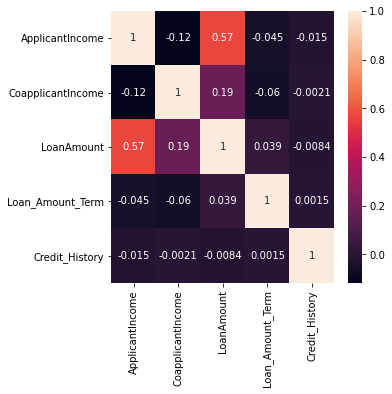

In [18]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), annot = True)

# Handle missing data

- We know that imputing missing data with <b>mean</b> values can only be done with numerical data.


- Another technique is median imputation in which the missing values are replaced with the median value of the entire feature column. When the data is skewed, it is good to consider using the median value for replacing the missing values.We must note that imputing missing data with <b>median</b> value can only be done with numerical data.


- Yet another technique is mode imputation in which the missing values are replaced with the mode value or most frequent value of the entire feature column. When the data is skewed, it is good to consider using <b>mode</b> values for replacing the missing values.We must note that imputing missing data with mode values can be done with numerical and categorical data.

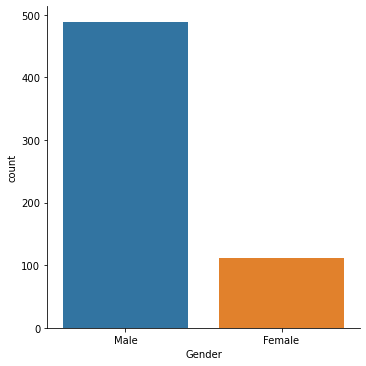

In [19]:
sns.catplot(x="Gender", kind="count", data=df)

There are more number of males applying for the loan tha females

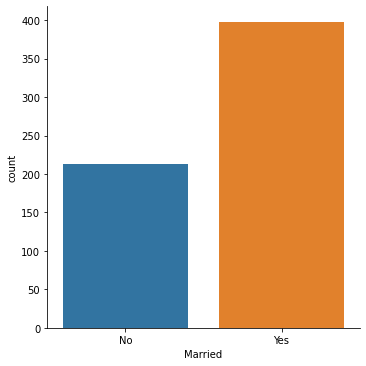

In [20]:
sns.catplot(x="Married", kind="count", data=df)

The majority of the Loan Applicant is the one who is married

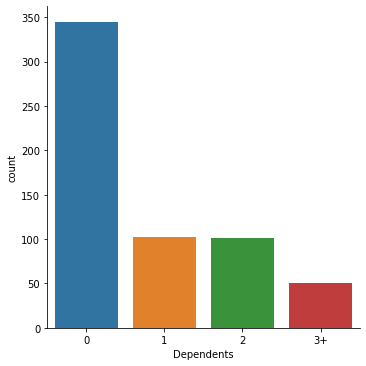

In [21]:
sns.catplot(x="Dependents", kind="count", data=df)

From the above graph, it is clear that the number of applicants applying for the loan has no applicant

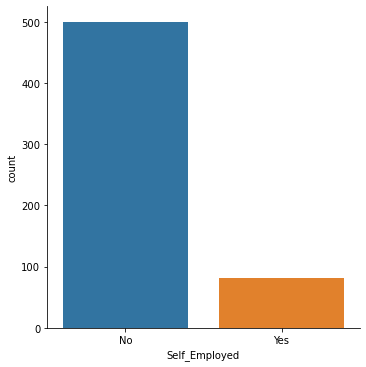

In [22]:
sns.catplot(x="Self_Employed", kind="count", data=df)

The maximum number of people applied for the Loan are not Self Employed

We see that Gender,Married,Dependents and Self_Employed are categorical data,hence, it is good to consider <b>mode</b> values for replacing the missing values

In [23]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

Now we have missing values in LoanAmount,Loan_Amount_Term and Credit_History.

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

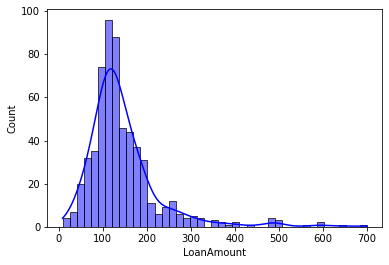

In [24]:
sns.histplot(df.LoanAmount,color="blue",kde=True,stat="count")

We see that it is skewed right and is not normally distributed and also there are not too much data which is missing, hence we will fill it using median

In [25]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

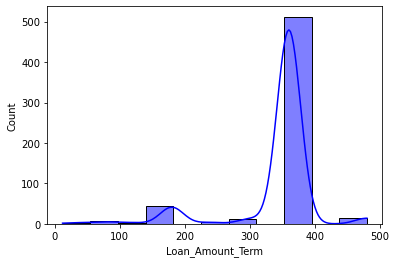

In [26]:
sns.histplot(df.Loan_Amount_Term,color="blue",kde=True,stat="count")

The Loan Amount Term is left skewed and is not normally distributed, hence we will fill this also with median

In [27]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['LoanAmount'].median())

In [28]:
print('Count of Credit History')
creditHistory_counts = df['Credit_History'].value_counts()
creditHistory_counts

Count of Credit History


1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

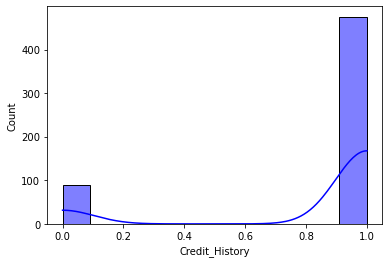

In [29]:
sns.histplot(df.Credit_History,color="blue",kde=True,stat="count")

In [30]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [31]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Check for Duplicates

In [32]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


There is not a single Duplicate row, hence we are good till this point

# Data Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

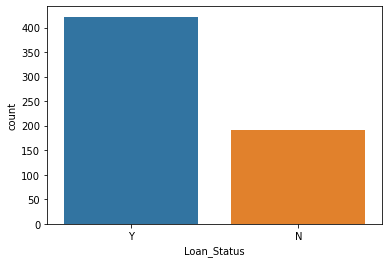

In [33]:
sns.countplot(df['Loan_Status'])

In [34]:
print('Loan Status')
loanStatus = df['Loan_Status'].value_counts()
loanStatus

Loan Status


Y    422
N    192
Name: Loan_Status, dtype: int64

The dataset is a bit imbalanced, we will be using techniques like SMOTE to handle such datasets, just to increase the minority classes in the training dataset

In [35]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
categorical_columns=[x for x in df.dtypes.index if df.dtypes[x] !='object']
categorical_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

LabelEncoder to convert the object Datatypes

In [37]:
import re
updated_LoanStatus = {"Y": 1, "N": 0}
data = [df]

for dataset in data:
    dataset['Loan_Status'] = dataset['Loan_Status'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Loan_Status'] = dataset['Loan_Status'].map(updated_LoanStatus)
    dataset['Loan_Status'] = dataset['Loan_Status'].astype(int)

In [38]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [39]:
df['LoanStatus_Rejected'] = 1 - df['Loan_Status']
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanStatus_Rejected
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,1


In [40]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

Lets create a new column LoanStatus_Rejected to anlayse the data

In [41]:
df['Total']=df['LoanStatus_Rejected']+df['Loan_Status']

In [42]:
df.groupby('Gender').agg('sum')[['LoanStatus_Rejected', 'Loan_Status','Total']]

,LoanStatus_Rejected,Loan_Status,Total
Gender,,,
Female,37,75,112
Male,155,347,502


<AxesSubplot:title={'center':'Loan Approved vs Rejected'}, xlabel='Gender'>

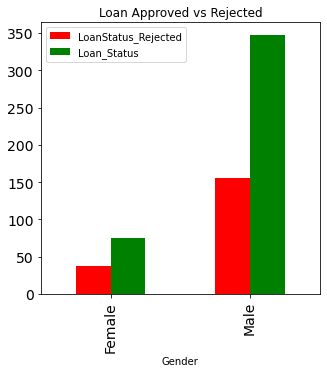

In [43]:
df.groupby('Gender').agg('sum')[['LoanStatus_Rejected', 'Loan_Status']].plot(kind='bar', figsize=(5,5),fontsize="14",stacked=False
                                                       ,color=['red', 'green'],title="Loan Approved vs Rejected")

In [46]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

<AxesSubplot:ylabel='None'>

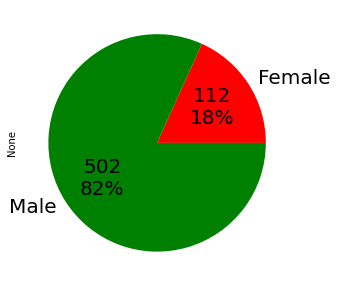

In [47]:
df.groupby('Gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},figsize=(5,5),
                                 colors=['red', 'green'])

82% of the applicant are male and 18% are Female, and out of this 33% of the Loan got rejected for Female applicant and 30% of the Loan got rejected for Male applicant

In [48]:
df.groupby('Married').agg('sum')[['LoanStatus_Rejected', 'Loan_Status','Total']]

,LoanStatus_Rejected,Loan_Status,Total
Married,,,
No,79,134,213
Yes,113,288,401


<AxesSubplot:title={'center':'Loan Approved vs Rejected'}, xlabel='Married'>

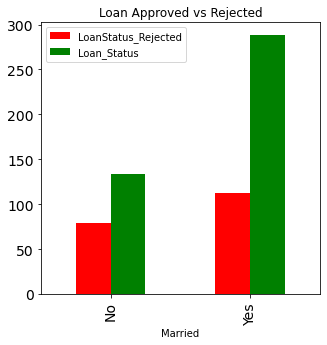

In [49]:
df.groupby('Married').agg('sum')[['LoanStatus_Rejected', 'Loan_Status']].plot(kind='bar', figsize=(5,5),fontsize="14",stacked=False
                                                       ,color=['red', 'green'],title="Loan Approved vs Rejected")

<AxesSubplot:ylabel='None'>

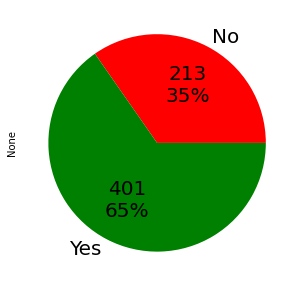

In [50]:
df.groupby('Married').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},figsize=(5,5),
                                 colors=['red', 'green'])

65% of married applicants have applied for the loan and 72% got their loan sanctioned successfully

In [705]:
df.groupby('Dependents').agg('sum')[['LoanStatus_Rejected', 'Loan_Status','Total']]

,LoanStatus_Rejected,Loan_Status,Total
Dependents,,,
0,113,247,360
1,36,66,102
2,25,76,101
3+,18,33,51


<AxesSubplot:title={'center':'Loan Approved vs Rejected'}, xlabel='Dependents'>

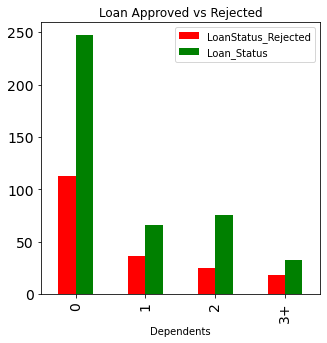

In [706]:
df.groupby('Dependents').agg('sum')[['LoanStatus_Rejected', 'Loan_Status']].plot(kind='bar', figsize=(5,5),fontsize="14",stacked=False
                                                       ,color=['red', 'green'],title="Loan Approved vs Rejected")

<AxesSubplot:ylabel='None'>

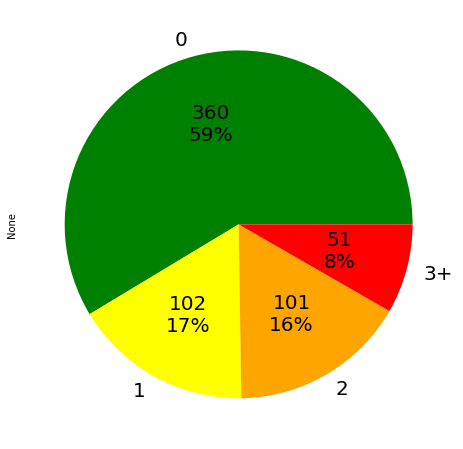

In [707]:
df.groupby('Dependents').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},figsize=(8,8),
                                 colors=['green', 'yellow','orange','red'])

59% of the applicants have no dependents and out of this 59%,68.6% of the them got their Loan sanctioned.

In [51]:
df.groupby('Education').agg('sum')[['LoanStatus_Rejected', 'Loan_Status','Total']]

,LoanStatus_Rejected,Loan_Status,Total
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134


<AxesSubplot:title={'center':'Loan Approved vs Rejected'}, xlabel='Education'>

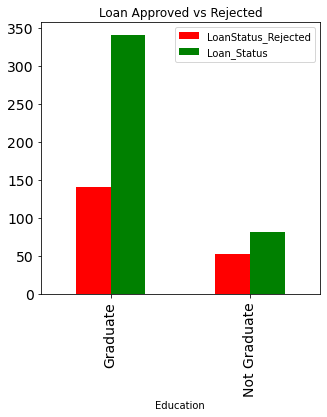

In [52]:
df.groupby('Education').agg('sum')[['LoanStatus_Rejected', 'Loan_Status']].plot(kind='bar', figsize=(5,5),fontsize="14",stacked=False
                                                       ,color=['red', 'green'],title="Loan Approved vs Rejected")

<AxesSubplot:ylabel='None'>

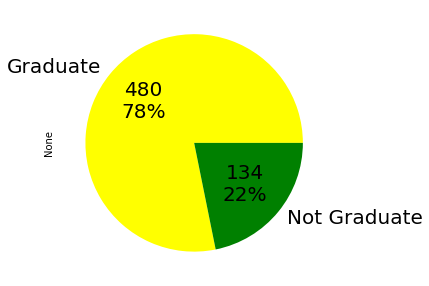

In [53]:
df.groupby('Education').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},figsize=(6, 5),
                                 colors=['yellow', 'green'])

78% of the Loan got sanctioned for the applicants who were graduate and Loan got sanctioned for 71% of the Graduate applicants

In [55]:
df.groupby('Self_Employed').agg('sum')[['LoanStatus_Rejected', 'Loan_Status']]

,LoanStatus_Rejected,Loan_Status
Self_Employed,,
No,166,366
Yes,26,56


<AxesSubplot:title={'center':'Loan Approved vs Rejected'}, xlabel='Self_Employed'>

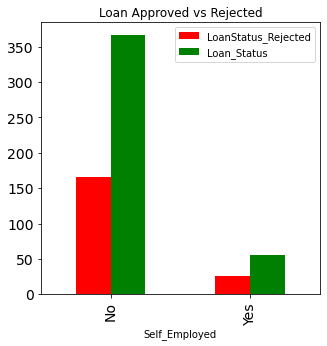

In [56]:
df.groupby('Self_Employed').agg('sum')[['LoanStatus_Rejected', 'Loan_Status']].plot(kind='bar', figsize=(5,5),fontsize="14",stacked=False
                                                       ,color=['red', 'green'],title="Loan Approved vs Rejected")

<AxesSubplot:ylabel='None'>

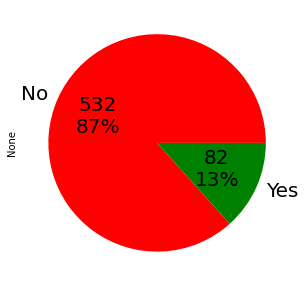

In [58]:
df.groupby('Self_Employed').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},figsize=(5,5),
                                 colors=['red', 'green'])

Only 13% of the applicants are self- employed, and out this 13% applied for Loan, 54% Loan got sanctioned  

In [715]:
df.groupby('ApplicantIncome').agg('sum')[['LoanStatus_Rejected', 'Loan_Status','Total']]

,LoanStatus_Rejected,Loan_Status,Total
ApplicantIncome,,,
150,1,0,1
210,0,1,1
416,1,0,1
645,0,1,1
674,0,1,1
...,...,...,...
39147,0,1,1
39999,0,1,1
51763,0,1,1


In [716]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanStatus_Rejected,Total
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0
mean,5403.459283,1621.245798,145.752443,337.120521,0.855049,0.687296,0.312704,1.0
std,6109.041673,2926.248369,84.107233,71.874064,0.352339,0.463973,0.463973,0.0
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,1.0
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,1.0
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,0.000000,1.0
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,1.0
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.0


Most of the Applicant Incomde lies between 2877 to 5795, and coapplicant income is between 0 to 2297, probably omost of them are housewife's. There are few outliers are in the income of Applicant and coapplicant

Now we are dividing the Applicant Income in the range of 150 to 2878 as low income, 2878 to 3813 as medium Income group, 3813 to 5795 as High Income Group and more than 5795 as Rich for further data analysis

In [59]:
lowIncomeGroup_DF=df[(df['ApplicantIncome'] >=150) & (df['ApplicantIncome'] <2878)]
lowIncomeGroup_DF.shape

(154, 15)

<AxesSubplot:ylabel='Loan_Status'>

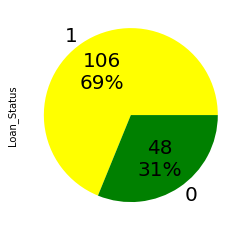

In [60]:
def lowIncomeGroup(val):
    return f'{val / 100 * len(lowIncomeGroup_DF):.0f}\n{val:.0f}%'

lowIncomeGroup_DF['Loan_Status'].value_counts().plot(kind='pie', autopct=lowIncomeGroup, textprops={'fontsize': 20},
                                 colors=['yellow', 'green'])

Out of 154, 106 got their Loan sanctioned and 48 applications were rejected

In [61]:
mediumIncomeGroup=df[(df['ApplicantIncome'] >=2878) & (df['ApplicantIncome'] <=3813)]
mediumIncomeGroup.shape

(154, 15)

<AxesSubplot:ylabel='Loan_Status'>

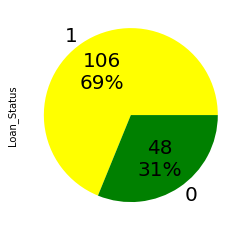

In [62]:
def medIncomeGroup(val):
    return f'{val / 100 * len(mediumIncomeGroup):.0f}\n{val:.0f}%'

mediumIncomeGroup['Loan_Status'].value_counts().plot(kind='pie', autopct=medIncomeGroup, textprops={'fontsize': 20},
                                 colors=['yellow', 'green'])

Out of 154 in medium earning range, 106 got their Loan sanctioned and 48 applications were rejected

In [64]:
highGroup_DF=df[(df['ApplicantIncome'] >3813) & (df['ApplicantIncome'] <=5797)]
highGroup_DF.shape

(152, 15)

<AxesSubplot:ylabel='Loan_Status'>

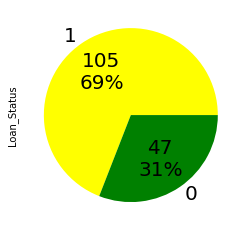

In [65]:
def highIncomeGroup(val):
    return f'{val / 100 * len(highGroup_DF):.0f}\n{val:.0f}%'

highGroup_DF['Loan_Status'].value_counts().plot(kind='pie', autopct=highIncomeGroup, textprops={'fontsize': 20},
                                 colors=['yellow', 'green'])

Out of 152 in High Income group, 105 got their Loan sanctioned and 47 applications were rejected

In [69]:
rich_DF=df[(df['ApplicantIncome'] >5795)]
rich_DF.shape

(154, 15)

<AxesSubplot:ylabel='Loan_Status'>

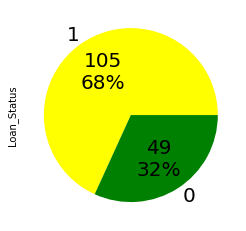

In [70]:
def rich(val):
    return f'{val / 100 * len(rich_DF):.0f}\n{val:.0f}%'

rich_DF['Loan_Status'].value_counts().plot(kind='pie', autopct=rich, textprops={'fontsize': 20},
                                 colors=['yellow', 'green'])

Out of 154 in the Rich category, 105 got their Loan sanctioned and 49 applications were rejected

<AxesSubplot:ylabel='Loan_Status'>

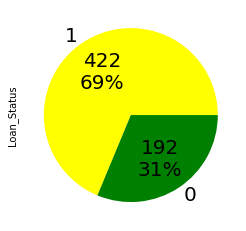

In [71]:
df['Loan_Status'].value_counts().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['yellow', 'green'])

If we see from the above graphs, 69% of the people got their loan sanctioned and 31% applications were rejected.

In [72]:
df.groupby('LoanAmount').agg('sum')[['LoanStatus_Rejected', 'Loan_Status','Total']]

,LoanStatus_Rejected,Loan_Status,Total
LoanAmount,,,
9.0,1,0,1
17.0,0,1,1
25.0,0,2,2
26.0,0,1,1
30.0,0,2,2
...,...,...,...
500.0,1,0,1
570.0,1,0,1
600.0,0,2,2


In [73]:
df.groupby('Loan_Amount_Term').agg('sum')[['LoanStatus_Rejected', 'Loan_Status','Total']]

,LoanStatus_Rejected,Loan_Status,Total
Loan_Amount_Term,,,
12.0,0,1,1
36.0,2,0,2
60.0,0,2,2
84.0,1,3,4
120.0,0,3,3
128.0,6,8,14
180.0,15,29,44
240.0,1,3,4
300.0,5,8,13


<AxesSubplot:title={'center':'Loan Approved vs Rejected'}, xlabel='Loan_Amount_Term'>

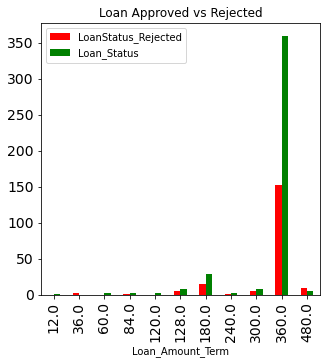

In [74]:
df.groupby('Loan_Amount_Term').agg('sum')[['LoanStatus_Rejected', 'Loan_Status']].plot(kind='bar', figsize=(5,5),fontsize="14",stacked=False
                                                       ,color=['red', 'green'],title="Loan Approved vs Rejected")

Maximum people applied for Loan term of 360 months i.e 30 years

In [81]:
df.groupby('Credit_History').agg('sum')[['LoanStatus_Rejected', 'Loan_Status','Total']]

,LoanStatus_Rejected,Loan_Status,Total
Credit_History,,,
0.0,82,7,89
1.0,110,415,525


<AxesSubplot:title={'center':'Loan Approved vs Rejected'}, xlabel='Credit_History'>

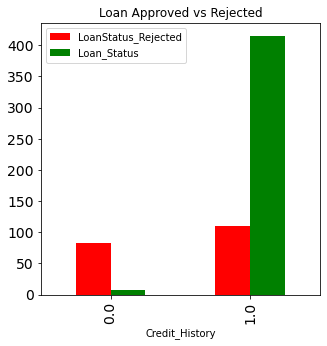

In [77]:
df.groupby('Credit_History').agg('sum')[['LoanStatus_Rejected', 'Loan_Status']].plot(kind='bar', figsize=(5,5),fontsize="14",stacked=False
                                                       ,color=['red', 'green'],title="Loan Approved vs Rejected")

<AxesSubplot:ylabel='None'>

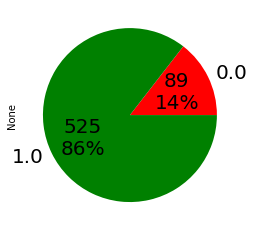

In [76]:
df.groupby('Credit_History').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['red', 'green'])

We see that 79% of the Loan got sanctioned for the applications whose Credit Histroy is 1 and 86% of the applications belongs to the those applicants whose Credit Hostroy is 1

In [78]:
df.groupby('Property_Area').agg('sum')[['LoanStatus_Rejected', 'Loan_Status','Total']]

,LoanStatus_Rejected,Loan_Status,Total
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202


<AxesSubplot:title={'center':'Loan Approved vs Rejected'}, xlabel='Property_Area'>

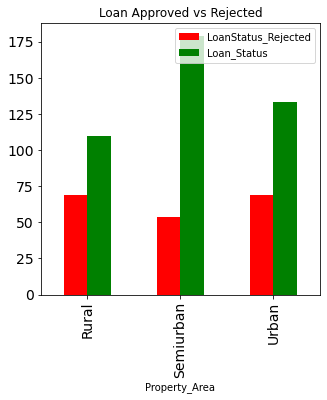

In [80]:
df.groupby('Property_Area').agg('sum')[['LoanStatus_Rejected', 'Loan_Status']].plot(kind='bar', figsize=(5,5),fontsize="14",stacked=False
                                                       ,color=['red', 'green'],title="Loan Approved vs Rejected")

<AxesSubplot:ylabel='None'>

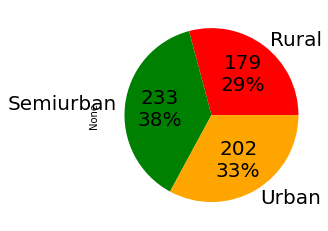

In [82]:
df.groupby('Property_Area').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['red', 'green','orange'])

The Property area is divided into three parts, Rural,Urban and Semiurban.

Semiurban had most of the loan sanctioned followed by Urban and Rural. 76% of the loan got sanctioned for semiurban area,65% of loan got sanctioned for urban area and 61% of the loan got sanctioned for Rural area

# Drop Columns
Loan_ID is the unique ID, this is basically the Loan number of each applicant, whether rejected or accepted. This will not play any significant role in prediction, Hence it is safe column for us to delete.

Also, we had created LoanStatus_Rejected and Total columns which will no longer be needed, Hence it is safe to delete too.

In [83]:
df.drop(columns=["Loan_ID","LoanStatus_Rejected","Total"],inplace=True)

In [84]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0


So we see that the columns Loan_ID,LoanStatus_Rejected and Total got successfully dropped

# Skewness

In [85]:
df_features=df.drop(columns=['Loan_Status'])

In [86]:
#Check Data Skewness
skew_df=pd.DataFrame({'Skewness':df_features.skew()}) 
skew_df

,Skewness
ApplicantIncome,6.539513
CoapplicantIncome,7.491531
LoanAmount,2.743053
Loan_Amount_Term,-2.116966
Credit_History,-2.021971


In [87]:
print("Out of",len(df_features.skew()),"features",len(df_features.skew().loc[abs(df_features.skew())>0.5]) ,"are skewed")

Out of 5 features 5 are skewed


# Log1p to handle skewness

In [89]:
for index in df_features.skew().index:
    if df_features.skew().loc[index]>0.5:
        df_features[index]=np.log1p(df_features[index])
    if df_features.skew().loc[index]<-0.5:
        df_features[index]=np.square(df_features[index])
print(df_features.skew())
print("Out of",len(df_features.skew()),"features",len(df_features.skew().loc[abs(df_features.skew())>0.5]) 
      ,"is skewed and has improved skewness value than previous skewness values")

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
Loan_Amount_Term     1.796980
Credit_History      -2.021971
dtype: float64
Out of 5 features 2 is skewed and has improved skewness value than previous skewness values


# Deal with Object DataTypes

In [90]:
categorical_columns=[x for x in df.dtypes.index if df.dtypes[x]=='object']
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [91]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in range(0,df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = le.fit_transform(df[df.columns[i]])

In [92]:
categorical_columns=[x for x in df.dtypes.index if df.dtypes[x]=='object']
categorical_columns

[]

Now we dont have any data with datatype as object

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


We have successfully converted all object types into int32 and now we can proceed to find Outliers and Skewness in our data.

<AxesSubplot:>

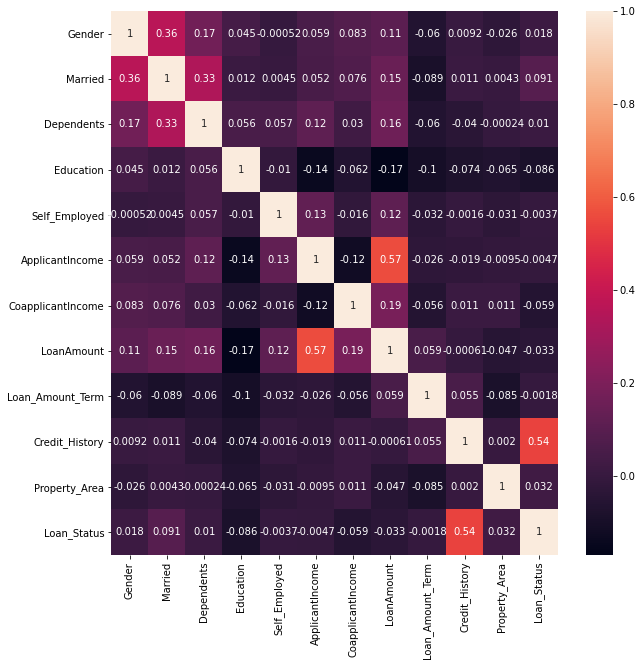

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

- Applicant Income and Loan Amount are bit correlated.

- Credit History and Loan_Status are correlated to some extent

# Outlier Checking

In [96]:
dataToPlot=df.loc[:, df.columns != 'Loan_Status']
dataToPlot.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0


In [97]:
targetToPlot=df.loc[:, df.columns == 'Loan_Status']
targetToPlot.head(2)

,Loan_Status
0,1
1,0


In [98]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

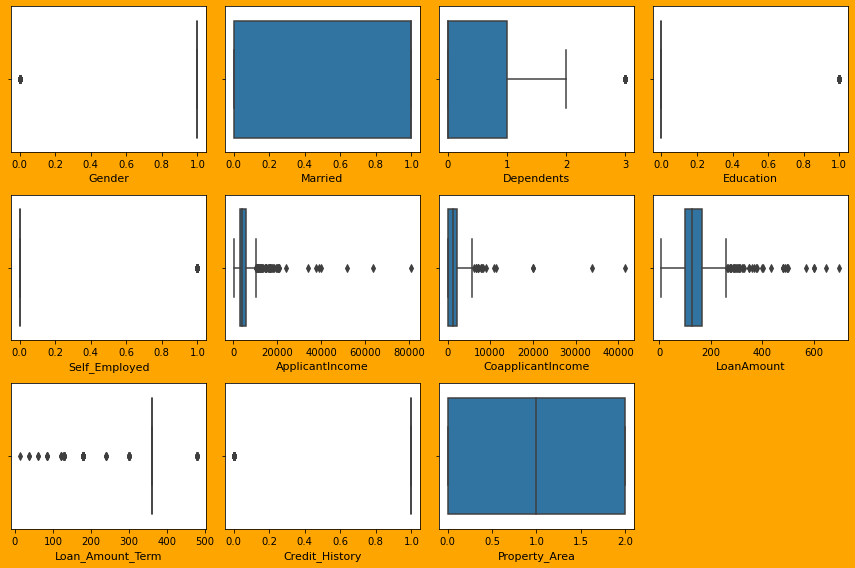

In [99]:
#Lets see data distribution now using Boxplot
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=12:
        ax=plt.subplot(3,4,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

Applicant Income, Coapplicant Incoem, Loan Amount have outliers

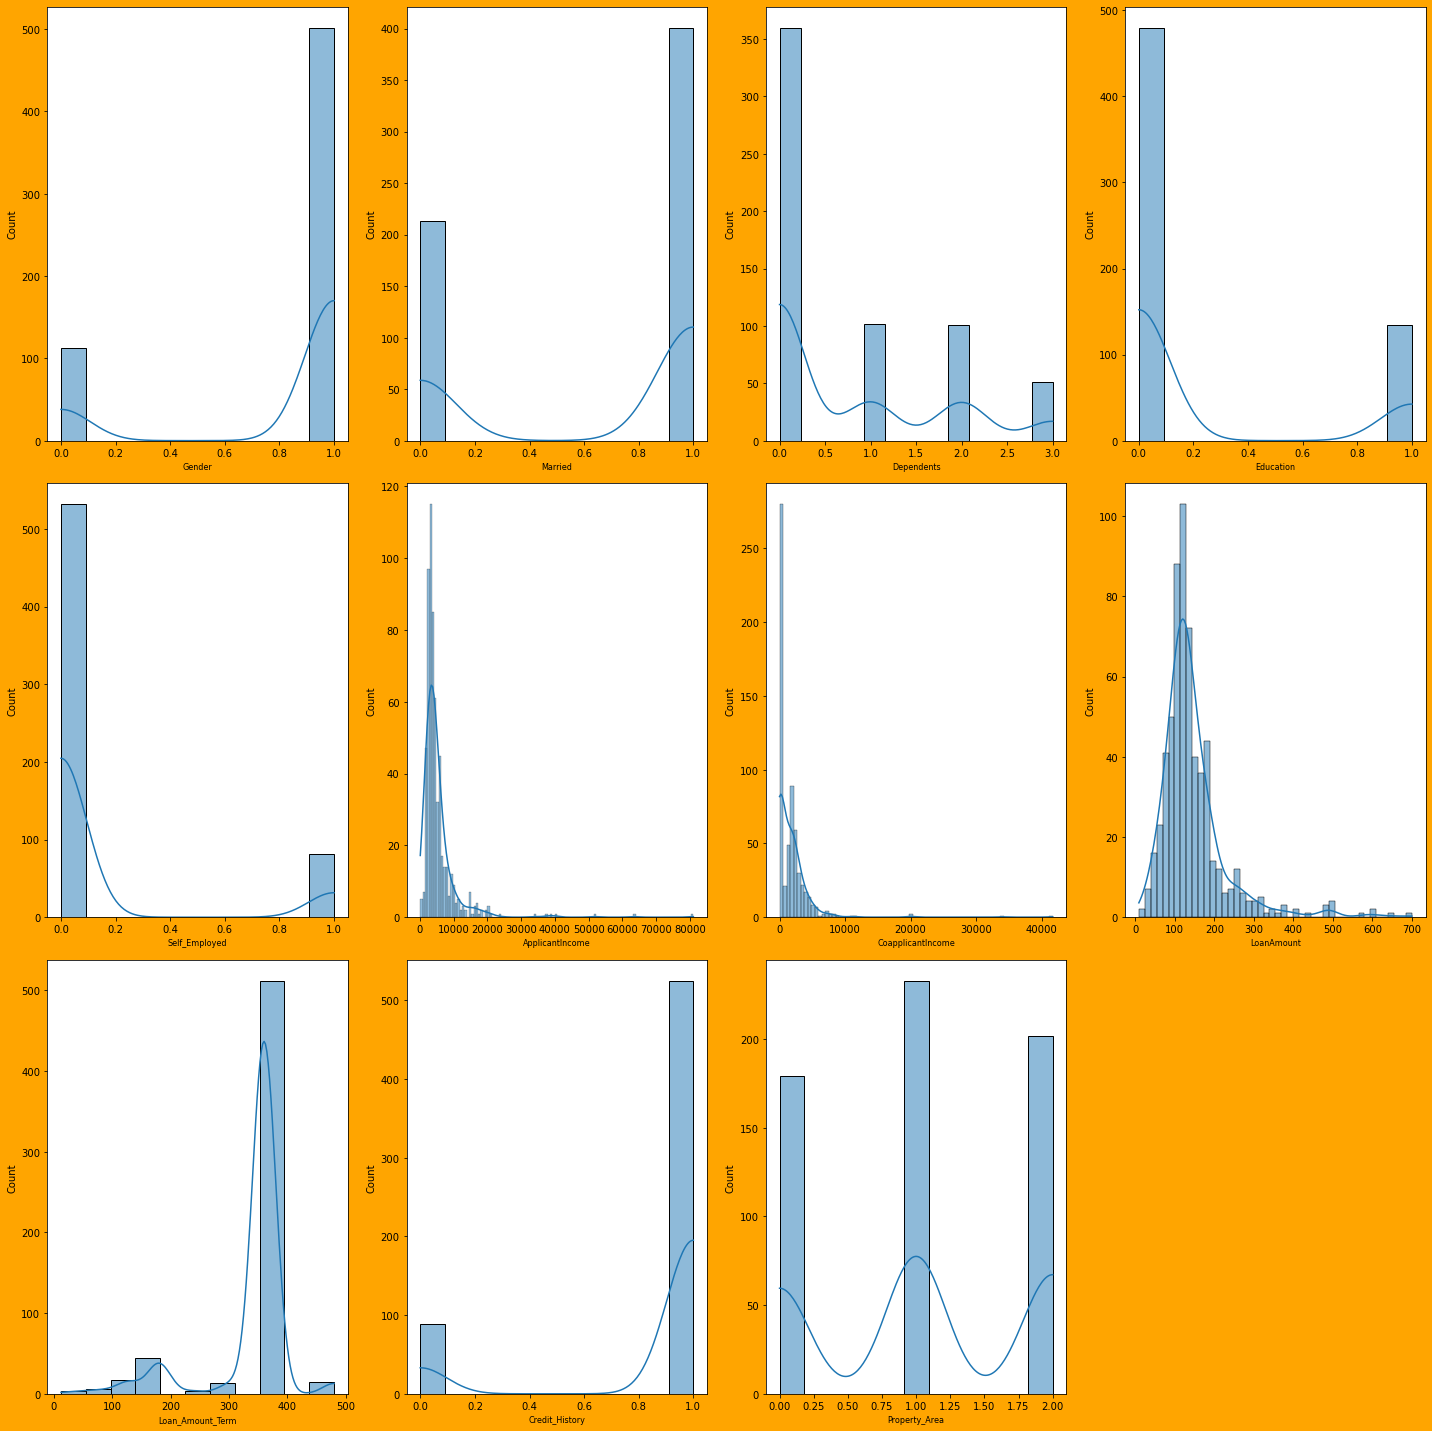

In [101]:
#Lets see data distribution again
plt.figure(figsize=(20,20),facecolor='orange')
plotnumber=1

for column in dataToPlot:
    #print(column)
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)        
        sns.histplot(dataToPlot[column],kde=True)
        plt.xlabel(column,fontsize=8)
        
    plotnumber+=1   
    
plt.tight_layout()

Applicant Income, Coapplicant Income and Loan Amount is right skewed and is not normally distributed

In [102]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(614, 12)

In [103]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [104]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(614, 12)
(577, 12)


In [105]:
loss_percentage= ((614-577)/614)*100
loss_percentage

6.026058631921824

We are accpeting this loss percentage and proceeding with further analysis

In [108]:
df=df_new

In [109]:
df.shape

(577, 12)

# Dividing into Features and Target

In [110]:
df_feature=df.drop(columns=["Loan_Status"])
df_feature.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0


In [111]:
target=df[["Loan_Status"]]
target.head(2)

,Loan_Status
0,1
1,0


In [112]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(df)

In [113]:
X_vif=df
X_vif.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1


In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=X_vif.columns

# Let's check the values now
vif

,vif,features
0,1.204378,Gender
1,1.349563,Married
2,1.171914,Dependents
3,1.085114,Education
4,1.072599,Self_Employed
5,1.624032,ApplicantIncome
6,1.465612,CoapplicantIncome
7,1.674810,LoanAmount
8,1.071871,Loan_Amount_Term
9,1.486837,Credit_History


In [115]:
features=df.drop(columns=['Loan_Status'])
target=df[["Loan_Status"]]

In [116]:
features.shape, target.shape

((577, 11), (577, 1))

In [117]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
feature_rf = RandomForestRegressor()
feature_rf.fit(features,target)

RandomForestRegressor()

In [118]:
print(feature_rf.feature_importances_)

[0.01674043 0.02122662 0.03777862 0.01900562 0.01301372 0.21501809
 0.11003483 0.17340158 0.03129752 0.32358642 0.03889654]


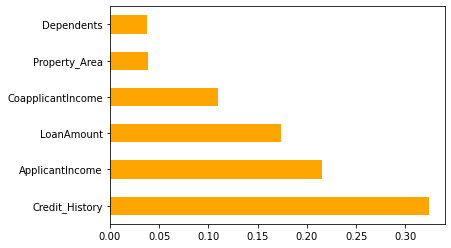

In [119]:
#plot graph of feature importances for better visualization
featureImportance = pd.Series(feature_rf.feature_importances_, index=features.columns)
featureImportance.nlargest(6).plot(kind='barh',color="orange") # Lets plot for 8 features 
plt.show()

# Model Building

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve,roc_auc_score, f1_score, confusion_matrix

Lets define a function now and use the same function everywhere to check the roc_auc score

In [179]:
from imblearn.over_sampling import SMOTE

def get_accuracy_score(model,x,y):
    max_accuracy_score=0
    for i in range(40,100):
        x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=i)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        accuracy=accuracy_score(y_test,pred_test)
        print("At",i," accuracy score is ",accuracy)
        if accuracy>max_accuracy_score:
            max_accuracy_score=accuracy
            final_i=i
    print("At",final_i,"max_accuracy_score is :",max_accuracy_score)
    return final_i

# Logistic Regression

In [180]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [181]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(target)
target=le.transform(target)
target

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

In [203]:
get_accuracy_score(lgr,features,target)

At 40  accuracy score is  0.7672413793103449
At 41  accuracy score is  0.75
At 42  accuracy score is  0.8017241379310345
At 43  accuracy score is  0.7672413793103449
At 44  accuracy score is  0.8017241379310345
At 45  accuracy score is  0.7672413793103449
At 46  accuracy score is  0.7327586206896551
At 47  accuracy score is  0.7672413793103449
At 48  accuracy score is  0.7413793103448276
At 49  accuracy score is  0.6982758620689655
At 50  accuracy score is  0.7758620689655172
At 51  accuracy score is  0.6896551724137931
At 52  accuracy score is  0.7413793103448276
At 53  accuracy score is  0.7241379310344828
At 54  accuracy score is  0.7155172413793104
At 55  accuracy score is  0.7241379310344828
At 56  accuracy score is  0.7586206896551724
At 57  accuracy score is  0.7844827586206896
At 58  accuracy score is  0.6896551724137931
At 59  accuracy score is  0.7586206896551724
At 60  accuracy score is  0.75
At 61  accuracy score is  0.75
At 62  accuracy score is  0.8189655172413793
At 63  

71

In [212]:
x_train, x_test, y_train, y_test = train_test_split(features,target,random_state=71,test_size=0.20)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
lgr.fit(x_train,y_train)
pred_train=lgr.predict(x_train)
pred_test=lgr.predict(x_test)
rocauc_scoreLR=roc_auc_score(y_test,pred_test)
accuracy_scoreLR=accuracy_score(y_test,pred_test)

In [213]:
rocauc_scoreLR,accuracy_scoreLR

(0.8011988011988012, 0.8620689655172413)

In [214]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

# classification report
print("Classification Report\n",classification_report(y_test, pred_test))

# confusion matrix
print("Confusion Matrix\n",confusion_matrix(y_test, pred_test))

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.62      0.75        39
           1       0.84      0.99      0.90        77

    accuracy                           0.86       116
   macro avg       0.90      0.80      0.83       116
weighted avg       0.88      0.86      0.85       116

Confusion Matrix
 [[24 15]
 [ 1 76]]


array([[24, 15],
       [ 1, 76]], dtype=int64)

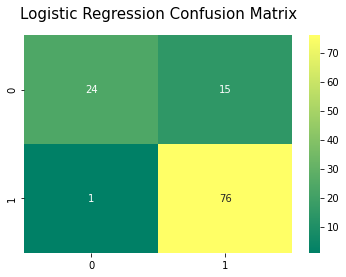

In [215]:
cm = confusion_matrix(y_test,pred_test)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,pred_test),annot=True,cmap="summer")
plt.title('Logistic Regression Confusion Matrix', y=1.05, size=15)
cm

# Cross Validation

In [216]:
pred_lgr=lgr.predict(x_test)
lss=accuracy_score(y_test,pred_lgr)
for j in range(2,10):
    lsScore=cross_val_score(lgr,features,target,cv=j)
    lsc=lsScore.mean()
    print("At cv",j)
    print("Cross Validation score is :",lsc*100)
    print("accuracy score is : ",lss*100)
    print('\n')

At cv 2
Cross Validation score is : 81.28544309880816
accuracy score is :  86.20689655172413


At cv 3
Cross Validation score is : 81.10967184801382
accuracy score is :  86.20689655172413


At cv 4
Cross Validation score is : 81.10871647509579
accuracy score is :  86.20689655172413


At cv 5
Cross Validation score is : 81.11244377811093
accuracy score is :  86.20689655172413


At cv 6
Cross Validation score is : 81.10502577319588
accuracy score is :  86.20689655172413


At cv 7
Cross Validation score is : 81.47013139666682
accuracy score is :  86.20689655172413


At cv 8
Cross Validation score is : 81.28091704718416
accuracy score is :  86.20689655172413


At cv 9
Cross Validation score is : 81.28205128205128
accuracy score is :  86.20689655172413




In [217]:
#So with above data,lets select CV as 5, as most of them as same CV
lsScore_selected=cross_val_score(lgr,features,target,cv=5).mean()
print("The CV score is :",lsScore_selected,"\n The accuracy score is: ",lss)

The CV score is : 0.8111244377811093 
 The accuracy score is:  0.8620689655172413


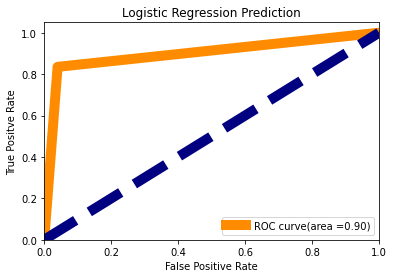

In [218]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area =%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('Logistic Regression Prediction')
plt.legend(loc="lower right")
plt.show()

In [219]:
score_data = {'Model': ['Logistic Regression'], 'Accuracy': lss*100,'Cross Validation Score':lsScore_selected*100}  

df_LR = pd.DataFrame(score_data)  
df_LR

,Model,Accuracy,Cross Validation Score
0,Logistic Regression,86.206897,81.112444


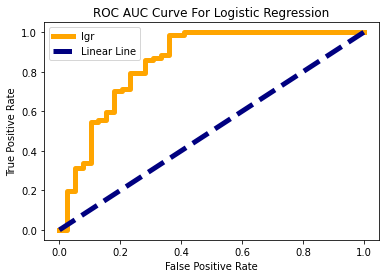

In [220]:
fpr, tpr, thresholds = roc_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,lgr.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='lgr',lw=5,color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve For Logistic Regression")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()

# SVM Classification

In [221]:
from sklearn.svm import SVC 
svc=SVC(probability=True)

In [222]:
get_accuracy_score(svc,features,target)

At 40  accuracy score is  0.49137931034482757
At 41  accuracy score is  0.49137931034482757
At 42  accuracy score is  0.5258620689655172
At 43  accuracy score is  0.6379310344827587
At 44  accuracy score is  0.5948275862068966
At 45  accuracy score is  0.4396551724137931
At 46  accuracy score is  0.43103448275862066
At 47  accuracy score is  0.5
At 48  accuracy score is  0.5948275862068966
At 49  accuracy score is  0.5344827586206896
At 50  accuracy score is  0.5517241379310345
At 51  accuracy score is  0.5517241379310345
At 52  accuracy score is  0.5258620689655172
At 53  accuracy score is  0.5431034482758621
At 54  accuracy score is  0.5258620689655172
At 55  accuracy score is  0.43103448275862066
At 56  accuracy score is  0.49137931034482757
At 57  accuracy score is  0.5603448275862069
At 58  accuracy score is  0.5775862068965517
At 59  accuracy score is  0.6379310344827587
At 60  accuracy score is  0.41379310344827586
At 61  accuracy score is  0.4827586206896552
At 62  accuracy sco

43

In [248]:
x_train, x_test, y_train, y_test = train_test_split(features,target,random_state=43,test_size=0.20)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
svc.fit(x_train,y_train)
pred_train=svc.predict(x_train)
pred_test=svc.predict(x_test)
rocauc_scoreSVC=roc_auc_score(y_test,pred_test)
accuracy_scoreSVC=accuracy_score(y_test,pred_test)
rocauc_scoreSVC,accuracy_scoreSVC

(0.5758928571428572, 0.6379310344827587)

Text(0.5, 1.05, 'SVM Confusion Matrix')

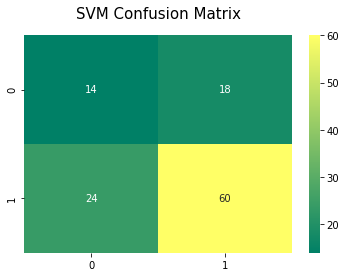

In [249]:
svm_cm=(confusion_matrix(y_test,pred_test))
svm_cm
sns.heatmap(svm_cm,annot=True,cmap="summer")
plt.title('SVM Confusion Matrix', y=1.05, size=15)

In [250]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.37      0.44      0.40        32
           1       0.77      0.71      0.74        84

    accuracy                           0.64       116
   macro avg       0.57      0.58      0.57       116
weighted avg       0.66      0.64      0.65       116



In [251]:
scr=cross_val_score(svc,features,target,cv=5)
print('Cross Validation score of SVM model is :',scr.mean())

Cross Validation score of SVM model is : 0.6897751124437781


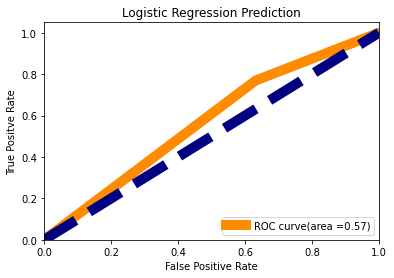

In [252]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area =%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('Logistic Regression Prediction')
plt.legend(loc="lower right")
plt.show()

In [253]:
score_data = {
             'Model': ['SVM'], 'Accuracy': (accuracy_scoreSVC)*100,'Cross Validation Score':scr.mean()*100
             }  

df_SVM = pd.DataFrame(score_data)  
df_SVM

,Model,Accuracy,Cross Validation Score
0,SVM,63.793103,68.977511


# Decision Tree Classifier

In [254]:
from sklearn.tree import DecisionTreeClassifier

# creating model
decTree = DecisionTreeClassifier()
params={'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [255]:
grid_Search=GridSearchCV(estimator=decTree,param_grid=params,cv=5,n_jobs=-1)

grid_Search.fit(x_train,y_train)
print("Best_Params_",grid_Search.best_params_)


Best_Params_ {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11}


In [257]:
get_accuracy_score(decTree,features,target)

At 40  accuracy score is  0.6896551724137931
At 41  accuracy score is  0.6982758620689655
At 42  accuracy score is  0.7068965517241379
At 43  accuracy score is  0.6551724137931034
At 44  accuracy score is  0.7068965517241379
At 45  accuracy score is  0.6982758620689655
At 46  accuracy score is  0.6810344827586207
At 47  accuracy score is  0.6724137931034483
At 48  accuracy score is  0.6982758620689655
At 49  accuracy score is  0.6982758620689655
At 50  accuracy score is  0.646551724137931
At 51  accuracy score is  0.6724137931034483
At 52  accuracy score is  0.7931034482758621
At 53  accuracy score is  0.6982758620689655
At 54  accuracy score is  0.6637931034482759
At 55  accuracy score is  0.7155172413793104
At 56  accuracy score is  0.75
At 57  accuracy score is  0.7241379310344828
At 58  accuracy score is  0.7241379310344828
At 59  accuracy score is  0.7241379310344828
At 60  accuracy score is  0.75
At 61  accuracy score is  0.7586206896551724
At 62  accuracy score is  0.68103448275

52

In [274]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=52)
decTrees=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=6,max_depth=10,min_samples_split=11)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
decTrees.fit(x_train,y_train)
pred_train=decTrees.predict(x_train)
pred_test=decTrees.predict(x_test)
rocauc_scoreTree=roc_auc_score(y_test,pred_test)
accuracy_scoreTree=accuracy_score(y_test,pred_test)
rocauc_scoreTree,accuracy_scoreTree

(0.7417503586800573, 0.7931034482758621)

Text(0.5, 1.05, 'Decision Tree Confusion Matrix')

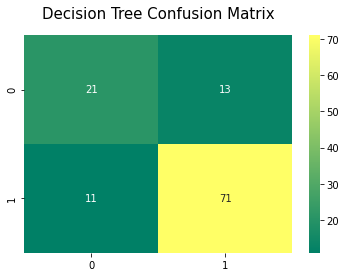

In [275]:
tree_cm=(confusion_matrix(y_test,pred_test))
tree_cm
sns.heatmap(tree_cm,annot=True,cmap="summer")
plt.title('Decision Tree Confusion Matrix', y=1.05, size=15)

In [276]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64        34
           1       0.85      0.87      0.86        82

    accuracy                           0.79       116
   macro avg       0.75      0.74      0.75       116
weighted avg       0.79      0.79      0.79       116



In [277]:
dtree=cross_val_score(decTrees,features,target,cv=5)
print('Cross Validation score of Decision Tree model is :',dtree.mean())

Cross Validation score of Decision Tree model is : 0.7417691154422787


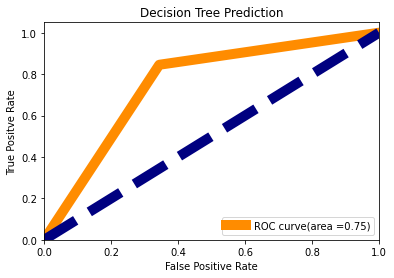

In [278]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area =%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('Decision Tree Prediction')
plt.legend(loc="lower right")
plt.show()

In [279]:
score_data = {'Model': ['Decision Tree'], 'Accuracy': (accuracy_scoreTree)*100,'Cross Validation Score':dtree.mean()*100}  

df_dt = pd.DataFrame(score_data)  
df_dt

,Model,Accuracy,Cross Validation Score
0,Decision Tree,79.310345,74.176912


# Random Forest Classifier

In [280]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
clf_rf = RandomForestClassifier()
params={'n_estimators':[100,150],
        'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'n_estimators': [100, 150],
 'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [172]:
grd=GridSearchCV(clf_rf,param_grid=params)
grd.fit(x_train,y_train)
print("Best_Params_",grd.best_params_)

Best_Params_ {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 100}


In [281]:
get_accuracy_score(clf_rf,features,target)

At 40  accuracy score is  0.7758620689655172
At 41  accuracy score is  0.7931034482758621
At 42  accuracy score is  0.7758620689655172
At 43  accuracy score is  0.7586206896551724
At 44  accuracy score is  0.7672413793103449
At 45  accuracy score is  0.7672413793103449
At 46  accuracy score is  0.7586206896551724
At 47  accuracy score is  0.7931034482758621
At 48  accuracy score is  0.75
At 49  accuracy score is  0.7586206896551724
At 50  accuracy score is  0.8103448275862069
At 51  accuracy score is  0.75
At 52  accuracy score is  0.8103448275862069
At 53  accuracy score is  0.7586206896551724
At 54  accuracy score is  0.7413793103448276
At 55  accuracy score is  0.7758620689655172
At 56  accuracy score is  0.8362068965517241
At 57  accuracy score is  0.7931034482758621
At 58  accuracy score is  0.7844827586206896
At 59  accuracy score is  0.7758620689655172
At 60  accuracy score is  0.7672413793103449
At 61  accuracy score is  0.7844827586206896
At 62  accuracy score is  0.8103448275

56

In [284]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=56)
clf_rfc=RandomForestClassifier(criterion='entropy',min_samples_leaf=5,max_depth=15,min_samples_split=11,n_estimators=100)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
clf_rfc.fit(x_train,y_train)
pred_train=clf_rfc.predict(x_train)
pred_test=clf_rfc.predict(x_test)
rocauc_scoreRF=roc_auc_score(y_test,pred_test)
accuracy_scoreRF=accuracy_score(y_test,pred_test)
rocauc_scoreRF,accuracy_scoreRF

(0.7068965517241379, 0.8362068965517241)

Text(0.5, 1.05, 'Random Forest Confusion Matrix')

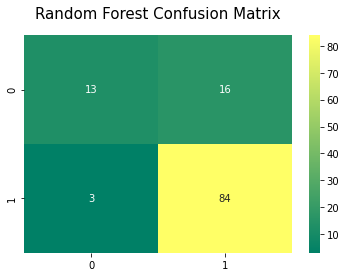

In [285]:
rfc_cm=(confusion_matrix(y_test,pred_test))
rfc_cm
sns.heatmap(rfc_cm,annot=True,cmap="summer")
plt.title('Random Forest Confusion Matrix', y=1.05, size=15)

In [286]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.81      0.45      0.58        29
           1       0.84      0.97      0.90        87

    accuracy                           0.84       116
   macro avg       0.83      0.71      0.74       116
weighted avg       0.83      0.84      0.82       116



In [287]:
#So with above data,lets select CV as 5, as most of them as same CV
lsScore_selected=cross_val_score(clf_rfc,features,target,cv=5).mean()
print("The CV score is :",lsScore_selected,"\n The accuracy score is: ",accuracy_scoreRF)

The CV score is : 0.8180809595202397 
 The accuracy score is:  0.8362068965517241


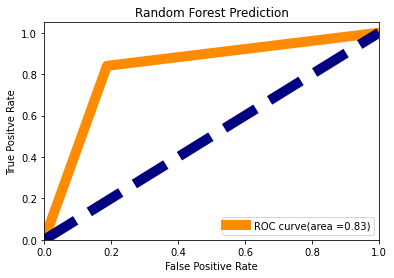

In [288]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area =%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('Random Forest Prediction')
plt.legend(loc="lower right")
plt.show()

In [289]:
score_data = {'Model': ['Random Forest'], 'Accuracy': accuracy_scoreRF*100,'Cross Validation Score':lsScore_selected*100}  

df_RF = pd.DataFrame(score_data)  
df_RF

,Model,Accuracy,Cross Validation Score
0,Random Forest,83.62069,81.808096


# Naive Byes Classification

In [290]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [291]:
get_accuracy_score(nb,features,target)

At 40  accuracy score is  0.7413793103448276
At 41  accuracy score is  0.75
At 42  accuracy score is  0.8103448275862069
At 43  accuracy score is  0.7672413793103449
At 44  accuracy score is  0.7672413793103449
At 45  accuracy score is  0.7327586206896551
At 46  accuracy score is  0.7241379310344828
At 47  accuracy score is  0.7413793103448276
At 48  accuracy score is  0.7931034482758621
At 49  accuracy score is  0.7586206896551724
At 50  accuracy score is  0.7931034482758621
At 51  accuracy score is  0.7068965517241379
At 52  accuracy score is  0.8103448275862069
At 53  accuracy score is  0.75
At 54  accuracy score is  0.7413793103448276
At 55  accuracy score is  0.7672413793103449
At 56  accuracy score is  0.8275862068965517
At 57  accuracy score is  0.7844827586206896
At 58  accuracy score is  0.7758620689655172
At 59  accuracy score is  0.7241379310344828
At 60  accuracy score is  0.7931034482758621
At 61  accuracy score is  0.7586206896551724
At 62  accuracy score is  0.8103448275

56

In [292]:
x_train, x_test, y_train, y_test = train_test_split(features,target,random_state=56,test_size=0.20)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
nb.fit(x_train,y_train)
pred_train=nb.predict(x_train)
pred_test=nb.predict(x_test)
rocauc_scoreNB=roc_auc_score(y_test,pred_test)
accuracy_scoreNB=accuracy_score(y_test,pred_test)
rocauc_scoreNB,accuracy_scoreNB

(0.6781609195402298, 0.8275862068965517)

Text(0.5, 1.05, 'Naive Byes Confusion Matrix')

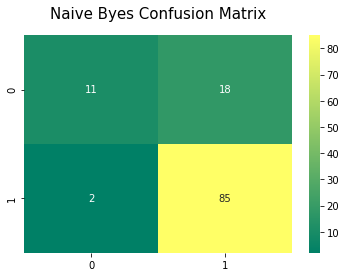

In [293]:
cm_nb=(confusion_matrix(y_test,pred_test))
cm_nb
sns.heatmap(cm_nb,annot=True,cmap="summer")
plt.title('Naive Byes Confusion Matrix', y=1.05, size=15)

In [294]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.85      0.38      0.52        29
           1       0.83      0.98      0.89        87

    accuracy                           0.83       116
   macro avg       0.84      0.68      0.71       116
weighted avg       0.83      0.83      0.80       116



In [295]:
cv_nb=cross_val_score(nb,features,target,cv=5)
print('Cross Validation score of Naive Byes model is :',cv_nb.mean())

Cross Validation score of Naive Byes model is : 0.7938380809595202


In [296]:
score_data = {
             'Model': ['Naive Byes'], 'Accuracy': (accuracy_scoreNB)*100,'Cross Validation Score':cv_nb.mean()*100
             }  

df_NB = pd.DataFrame(score_data)  
df_NB

,Model,Accuracy,Cross Validation Score
0,Naive Byes,82.758621,79.383808


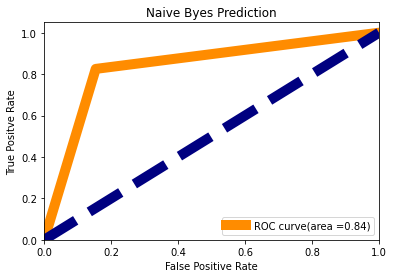

In [297]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area =%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('Naive Byes Prediction')
plt.legend(loc="lower right")
plt.show()

In [298]:
modelDF=pd.concat([df_LR,df_SVM,df_dt,df_RF,df_NB]).reset_index()
modelDF.drop(columns=['index'],axis=1,inplace=True)
modelDF

,Model,Accuracy,Cross Validation Score
0,Logistic Regression,86.206897,81.112444
1,SVM,63.793103,68.977511
2,Decision Tree,79.310345,74.176912
3,Random Forest,83.620690,81.808096
4,Naive Byes,82.758621,79.383808


Looking at the above model we see that least difference of Accuracy Score and Cross Validation Score is for Random Forest Classifier. Now lets plot the roc auc graph 

In [300]:
roc_auc_dict = {} #ROC AUC dict for TPR and FPR values
precision_recall_dict = {} #precision recall dictionary

def modify_roc_auc_dict(clf, y_test, x_test, name ,modify_dictionary):
    # Modifies a dictionary in place and adds keys for ROC AUC metrics
    fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
    clf_roc_auc_dict = {'fpr':fpr, 'tpr': tpr, 'thresholds': thresholds}
    modify_dictionary[name] = clf_roc_auc_dict
    
def modify_precision_recall_dict(clf, y_test, x_test, name ,modify_dictionary):
    # Modifies a dictionary in place and adds keys for precision recall metrics
    precision, recall, thresholds = precision_recall_curve(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
    precision_recall_dict = {'precision':precision, 'recall': recall, 'thresholds': thresholds}
    modify_dictionary[name] = precision_recall_dict

In [301]:
def fit_clf(clf, x_train, y_train, x_test, y_test, name='clf'): 
    clf.fit(x_train, y_train) 
    y_pred = clf.predict(x_test)
    class_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    class_report['clf'] = name 
    return class_report

In [302]:
lgr_report = fit_clf(lgr, x_train, y_train, x_test, y_test, name='Logistic Regression')
lgr_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.52381,0.810526,0.758621,0.667168,0.738847,Logistic Regression
recall,0.37931,0.885057,0.758621,0.632184,0.758621,Logistic Regression
f1-score,0.44000,0.846154,0.758621,0.643077,0.744615,Logistic Regression
support,29.00000,87.000000,0.758621,116.000000,116.000000,Logistic Regression


In [303]:
svc_report = fit_clf(svc, x_train, y_train, x_test, y_test, name='SupportVector')
svc_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.237288,0.736842,0.482759,0.487065,0.611954,SupportVector
recall,0.482759,0.482759,0.482759,0.482759,0.482759,SupportVector
f1-score,0.318182,0.583333,0.482759,0.450758,0.517045,SupportVector
support,29.000000,87.000000,0.482759,116.000000,116.000000,SupportVector


In [304]:
tree_report = fit_clf(decTrees, x_train, y_train, x_test, y_test, name='DecisionTreeClassifier')
tree_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.454545,0.831325,0.724138,0.642935,0.737130,DecisionTreeClassifier
recall,0.517241,0.793103,0.724138,0.655172,0.724138,DecisionTreeClassifier
f1-score,0.483871,0.811765,0.724138,0.647818,0.729791,DecisionTreeClassifier
support,29.000000,87.000000,0.724138,116.000000,116.000000,DecisionTreeClassifier


In [305]:
forest_report = fit_clf(clf_rfc, x_train, y_train, x_test, y_test, name='RandomForestClassifier')
forest_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.933333,0.851485,0.862069,0.892409,0.871947,RandomForestClassifier
recall,0.482759,0.988506,0.862069,0.735632,0.862069,RandomForestClassifier
f1-score,0.636364,0.914894,0.862069,0.775629,0.845261,RandomForestClassifier
support,29.000000,87.000000,0.862069,116.000000,116.000000,RandomForestClassifier


In [306]:
naiveByes_report = fit_clf(nb, x_train, y_train, x_test, y_test, name='NaiveByesClassifier')
naiveByes_report.head()

,0,1,accuracy,macro avg,weighted avg,clf
precision,0.846154,0.825243,0.827586,0.835698,0.830471,NaiveByesClassifier
recall,0.379310,0.977011,0.827586,0.678161,0.827586,NaiveByesClassifier
f1-score,0.523810,0.894737,0.827586,0.709273,0.802005,NaiveByesClassifier
support,29.000000,87.000000,0.827586,116.000000,116.000000,NaiveByesClassifier


In [307]:
#Lets Check the Keys which we have
roc_auc_dict.keys()

dict_keys([])

In [308]:
modify_roc_auc_dict(clf=lgr,y_test=y_test,x_test=x_test,name='LogisticRegresssion',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=svc,y_test=y_test,x_test=x_test,name='SupportVector',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=decTrees,y_test=y_test,x_test=x_test,name='DecisionTreeClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=clf_rfc,y_test=y_test,x_test=x_test,name='RandomForestClassifier',modify_dictionary=roc_auc_dict)
modify_roc_auc_dict(clf=nb,y_test=y_test,x_test=x_test,name='NaiveByesClassifier',modify_dictionary=roc_auc_dict)

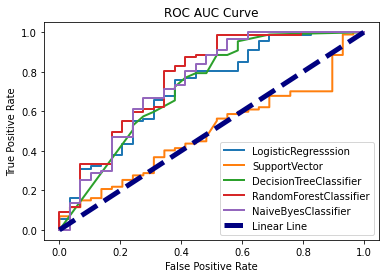

In [309]:
for key in roc_auc_dict:
    clf = roc_auc_dict[key]
    plt.plot(clf['fpr'], clf['tpr'], label=key,lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Curve")
plt.plot([0,1], [0,1], label='Linear Line', color='navy',lw=5,linestyle='--')
plt.legend()
plt.show()

The above graph shows us the comparision between the True Positive and False Positive rates and we see that Random Forest Classifier is performing best. Also the least difference between Accuracy Score and Cross Validation Score is for Random Forest Classifier, so we will select this model for our prediction. Lets predict the test cases now.

In [316]:
#Predicting the test cases
predict_LoanStatus = pd.DataFrame({ 'actual':  y_test,
                                      'predicted': clf_rfc.predict(x_test),
                                      'Correctly_Predicted':(y_test)-(clf_rfc.predict(x_test))
                                    })
predict_LoanStatus

,actual,predicted,Correctly_Predicted
0,1,1,0
1,1,1,0
2,0,0,0
3,0,1,-1
4,0,1,-1
...,...,...,...
111,1,1,0
112,0,0,0
113,1,1,0
114,1,1,0


In [317]:
predict_LoanStatus = predict_LoanStatus.reset_index()
predict_LoanStatus['Correctly_Predicted'].value_counts()


 0    100
-1     15
 1      1
Name: Correctly_Predicted, dtype: int64

<AxesSubplot:xlabel='Correctly_Predicted', ylabel='count'>

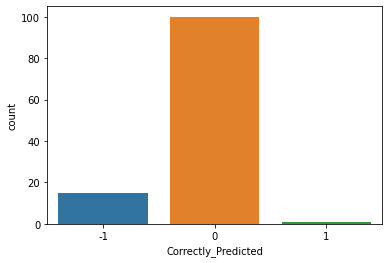

In [318]:
sns.countplot(predict_LoanStatus.Correctly_Predicted)

In [319]:
101/116

0.8706896551724138

87% is the accuracy of correctness and we see that model is behaving well !

# Saving the Model

In [320]:
from joblib import dump , load
dump(clf_rf,'LoanApplications.joblib')
forest_load=load('LoanApplications.joblib')

In [321]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
filename = os.path.join(savedir, 'LoanApplications.joblib')

In [322]:
import joblib
joblib.dump(clf_rf, filename) 
#['...LoanApplications.joblib']

['C:\\Users\\mum1user\\AppData\\Local\\Temp\\tmpcwswa3q1\\LoanApplications.joblib']

In [323]:
joblib.load(filename)

RandomForestClassifier()